/home/guillem_ares/miniconda3/lib/python3.11/site-packages/biotite/structure/hbond.py:245: UserWarning: Input structure has no associated 'BondList', Hydrogen atoms bonded to donors are detected by distance
  warnings.warn(


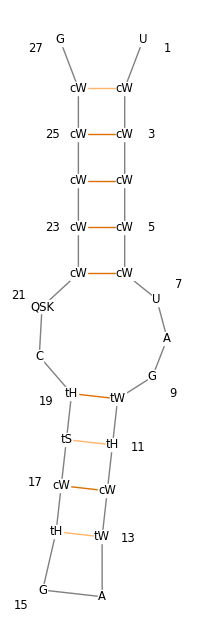

In [1]:
from tempfile import gettempdir
import biotite
import biotite.structure.io.pdb as pdb
import biotite.database.rcsb as rcsb
import biotite.structure as struc
import biotite.structure.graphics as graphics
import matplotlib.pyplot as plt
import numpy as np


# Download the PDB file and read the structure
pdb_file_path = rcsb.fetch("6ZYB", "pdb", gettempdir())
pdb_file = pdb.PDBFile.read(pdb_file_path)
atom_array = pdb.get_structure(pdb_file)[0]
nucleotides = atom_array[struc.filter_nucleotides(atom_array)]

# Compute the base pairs and the Leontis-Westhof nomenclature
base_pairs = struc.base_pairs(nucleotides)
glycosidic_bonds = struc.base_pairs_glycosidic_bond(nucleotides, base_pairs)
edges = struc.base_pairs_edge(nucleotides, base_pairs)
base_pairs = struc.get_residue_positions(
    nucleotides, base_pairs.flatten()
).reshape(base_pairs.shape)

# Get the one-letter-codes of the bases
base_labels = []
for base in struc.residue_iter(nucleotides):
    base_labels.append(base.res_name[0])

# Color canonical Watson-Crick base pairs with a darker orange and
# non-canonical base pairs with a lighter orange
colors = np.full(base_pairs.shape[0], biotite.colors['brightorange'])
for i, (base1, base2) in enumerate(base_pairs):
    name1 = base_labels[base1]
    name2 = base_labels[base2]
    if sorted([name1, name2]) in [["A", "U"], ["C", "G"]]:
        colors[i] = biotite.colors["dimorange"]

# Use the base labels to indicate the Leontis-Westhof nomenclature
for bases, edge_types, orientation in zip(base_pairs, edges, glycosidic_bonds):
    for base, edge in zip(bases, edge_types):
        if orientation == 1:
            annotation = "c"
        else:
            annotation = "t"
        if edge == 1:
            annotation += "W"
        elif edge == 2:
            annotation += "H"
        else:
            annotation += "S"
        base_labels[base] = annotation

# Create a matplotlib pyplot
fig, ax = plt.subplots(figsize=(8.0, 8.0))

# Plot the secondary structure
graphics.plot_nucleotide_secondary_structure(
    ax, base_labels, base_pairs, struc.get_residue_count(nucleotides),
    bond_color=colors
)

# Display the plot
plt.show()